# Import Libraries

In [93]:
from py_vollib.black_scholes  import black_scholes as bs
from py_vollib.black_scholes.greeks.analytical import vega
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

# Newton Raphson Method 

In [110]:
lista_ivs=[]
lista_differences=[]
def iv(S,K,T,r,price,tipo="c",tol=0.00001):
    interations=1000
    iv_anterior=0.20 # Initial Guess
    for x in range(interations):
        bs_price=bs(tipo,S,K,T,r,iv_anterior)
        derivada_sigma=vega(tipo,S,K,T,r,iv_anterior)*100# Percentage
        difference=bs_price-price
        iv_atual=iv_anterior-difference/derivada_sigma
        bs_price_novo=bs(tipo,S,K,T,r,iv_atual)
        lista_differences.append(abs(iv_anterior-iv_atual))
        lista_ivs.append(iv_atual)
        if (abs(iv_anterior-iv_atual)<tol or abs(bs_price_novo-price)<tol ): break
        iv_anterior=iv_atual
    implied_volatility=iv_atual
    return implied_volatility

# Results

In [111]:
S,K,T,r=100,110,30/252,0.0515 # Spot price, strike price, time,risk free
price=3.47 # market price of the option contract
print(f"IV: {(iv(S,K,T,r,price)*100).round(4)}%")

IV: 50.0164%


In [112]:
# maybe I can do a Newton Raphson with Sympy and i just need to def the normal density probability function

Text(0.5, 1.0, 'Actual IV - Previous IV')

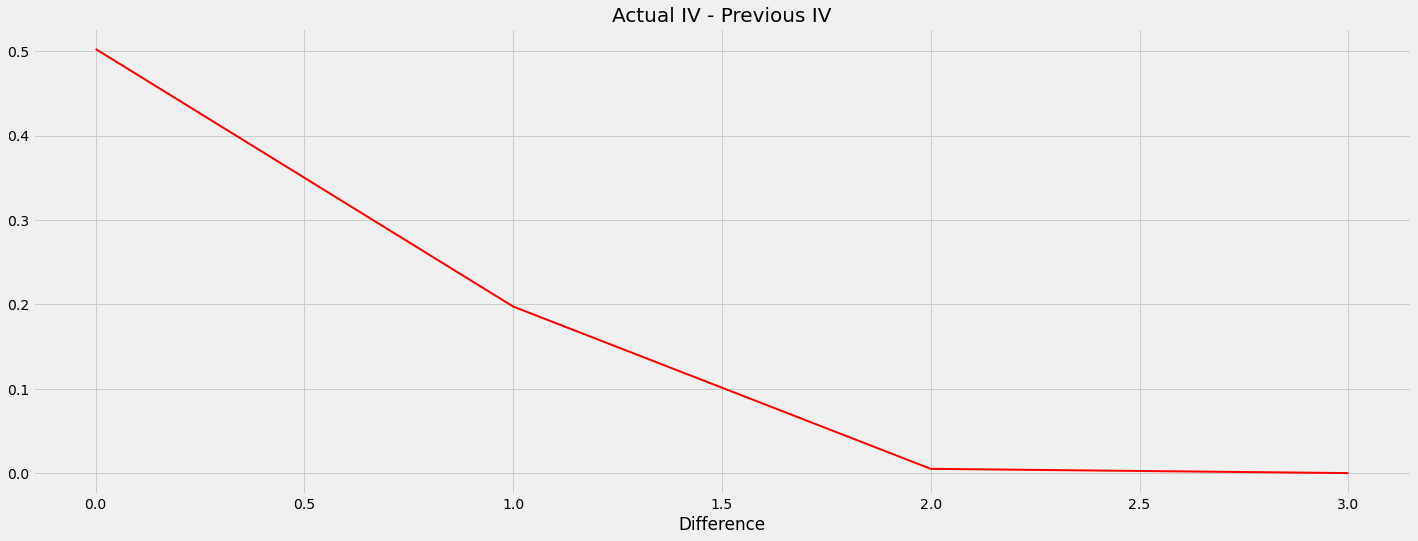

In [113]:
plt.figure(figsize=(22,8))
plt.plot(lista_differences,color="red",linewidth=2)
plt.xlabel('Interactions')
plt.xlabel('Difference')
plt.title("Actual IV - Previous IV",fontsize=20)

Text(0.5, 1.0, 'IVS per Interaction')

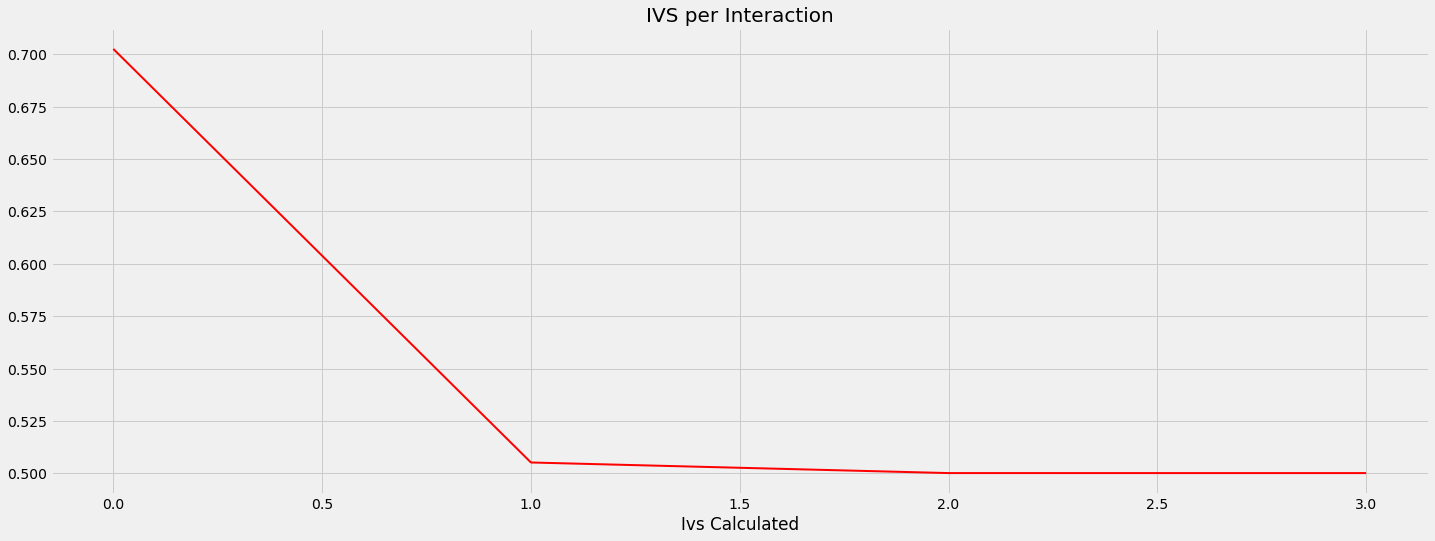

In [114]:
plt.figure(figsize=(22,8))
plt.plot(lista_ivs,color="red",linewidth=2)
plt.xlabel('Interactions')
plt.xlabel('Ivs Calculated')
plt.title("IVS per Interaction",fontsize=20)